In [1]:
import pandas as pd 
import numpy as np
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# 6210450059 ชัชชาย จันทร์เพ็ชร์
---

คำอธิบาย dataset
---
index : This is the serial number or unique identifier of the loan taker


Employed: This is a Boolean 1= employed 0= unemployed

Bank Balance: Bank Balance of the loan taker

Annual Salary: Annual salary of the loan taker

Defaulted? : This is a Boolean 1= defaulted 0= not defaulted

---

index : serial number ของผู้กู้

Employed: 1 เป็นลูกจ้าง, 0 ว่างงาน

Bank Balance: เงินในบัญชีของผู้กู้

Annual Salary: รายได้ประจำปี

Defaulted? : 1 ได้รับการกู้ 0 ไม่ได้รับ

## Read Data

In [2]:
df =pd.read_csv('Default_Fin.csv')


In [3]:
df.head() ## index ไม่จำเป็น

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df = df.drop(['Index'],axis=1)

In [5]:
df.info() #no-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [6]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


### mean : Bank Balance -> 10024
### Mostly Annual Salary -> 402203 

## Analysis 

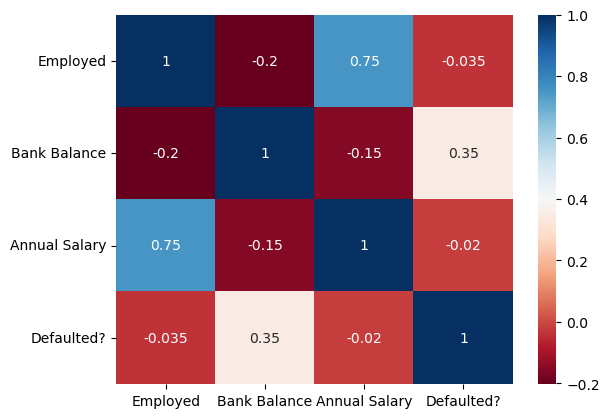

In [7]:
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.show()

### เมื่อเอาคอลัมน์ของข้อมูลมาเปรียบเทียบกับตัว label (Deafulted) จะได้ความสัมพันธ์ดังนี้ 
- Defaulted จะมีความสัมพันธ์กับ Bank Balance และ Annual Salary ตามลำดับ

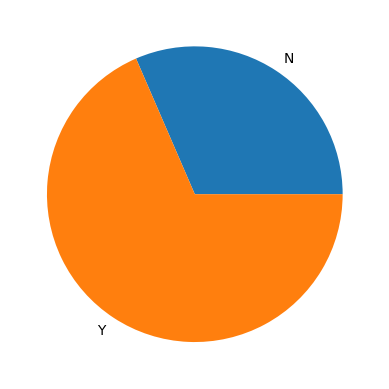

In [8]:
chart = np.array([df[df['Defaulted?']==0]['Bank Balance'].mean(),df[df['Defaulted?']==1]['Bank Balance'].mean()])
mylabels = ['N','Y']
plt.pie(chart,labels= mylabels)
plt.show()

### ค่าเฉลี่ยค่าเงินในข้อมูลมีความใกล้เคียงกัน

### หาความสัมพันธ์

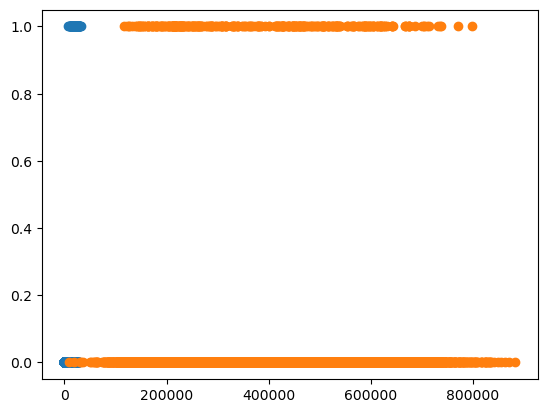

In [9]:
plt.scatter(df['Bank Balance'],df['Defaulted?'])
plt.scatter(df['Annual Salary'],df['Defaulted?'])
plt.show()

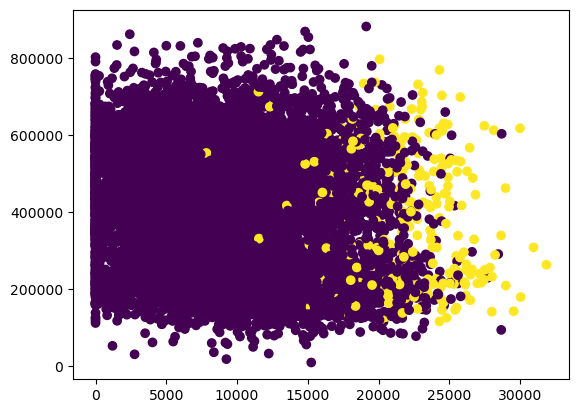

In [10]:
plt.scatter(df['Bank Balance'],df['Annual Salary'],c=df['Defaulted?']) #x = Bank Balance y = Annual Salary
plt.show()


## Train

In [11]:
df = df.drop(['Employed'],axis=1)

In [12]:

x=df.drop(['Defaulted?'],axis=1).values
y = df['Defaulted?'].values
model = LogisticRegression(class_weight='balanced')
knn = KNeighborsClassifier(n_neighbors=3)
per = Perceptron()
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
model.fit(x_train,y_train)
knn.fit(x_train,y_train)
per.fit(x_train,y_train)

Perceptron()

## Comparing the models to find the best fit model

In [13]:
def report(model):
    preds = model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)
    plt.show()


LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1276
           1       0.81      0.08      0.15       724

    accuracy                           0.66      2000
   macro avg       0.73      0.54      0.47      2000
weighted avg       0.71      0.66      0.56      2000



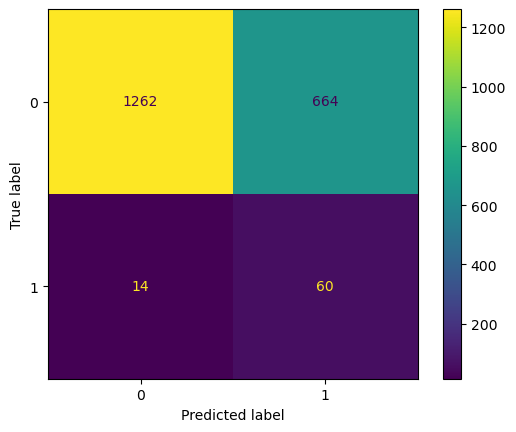

In [14]:
print("LOGISTIC REGRESSION MODEL")
report(model)

KNN MODEL
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1974
           1       0.22      0.62      0.32        26

    accuracy                           0.97      2000
   macro avg       0.61      0.79      0.65      2000
weighted avg       0.98      0.97      0.97      2000



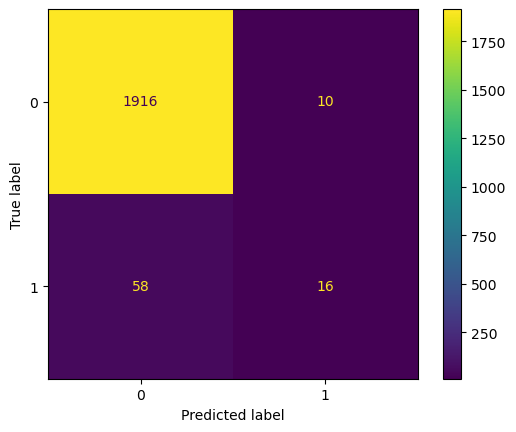

In [15]:
print("KNN MODEL")
report(knn)

Percepton MODEL
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1999
           1       0.00      0.00      0.00         1

    accuracy                           0.96      2000
   macro avg       0.50      0.48      0.49      2000
weighted avg       1.00      0.96      0.98      2000



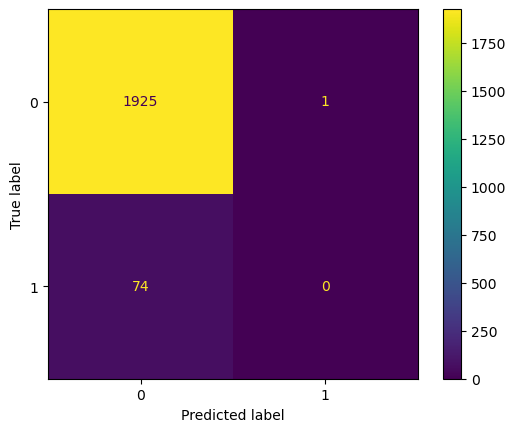

In [16]:
print("Percepton MODEL")
report(per)

In [17]:
print(pd.DataFrame(np.array([
    ["logistic regression",accuracy_score(y_test,model.predict(x_test))],
    ["KNN ",accuracy_score(y_test,knn.predict(x_test))],
    ["Percepton ",accuracy_score(y_test,per.predict(x_test))],
]),columns=['Model','Accuracy']
))

                 Model Accuracy
0  logistic regression    0.661
1                 KNN     0.966
2           Percepton    0.9625
